# **CUSTOMER SEGMENTATION USING CLUSTERING**

#### **Importing Dependencies**

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
import warnings
warnings.filterwarnings("ignore")


#### **Loading Data**

In [42]:
data_set = pd.read_csv('Mall_Customers.csv')
data_set

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### **Overview of Data**

In [43]:
# Getting Data Size 
shape = data_set.shape
print(f"The dataset has {shape[0]} rows and {shape[1]} number of columns")

The dataset has 200 rows and 5 number of columns


In [44]:
# Getting information about Dataset
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [45]:
# Checking for Missing Values
data_set.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [46]:
# Checking for Duplicates
duplicates = data_set.duplicated().sum()
print(f"The dataset has {duplicates} duplicate rows")

The dataset has 0 duplicate rows


In [47]:
# Checking for Unique Values in each column
unique_values = data_set.nunique()
print("Unique values in each column:")  
print(unique_values)

Unique values in each column:
CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64


In [48]:
# Displaying Column Names
data_set.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [49]:
# Descriptive Analysis of Dataset
data_set.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### **EDA - Exploratory Data Analysis**

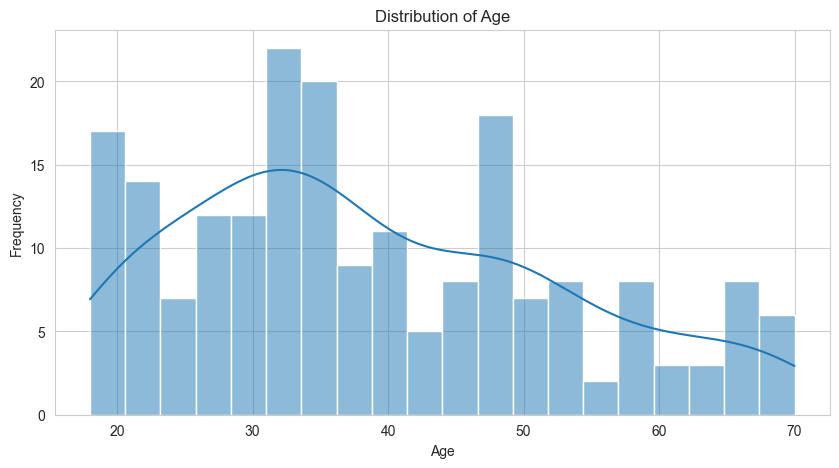

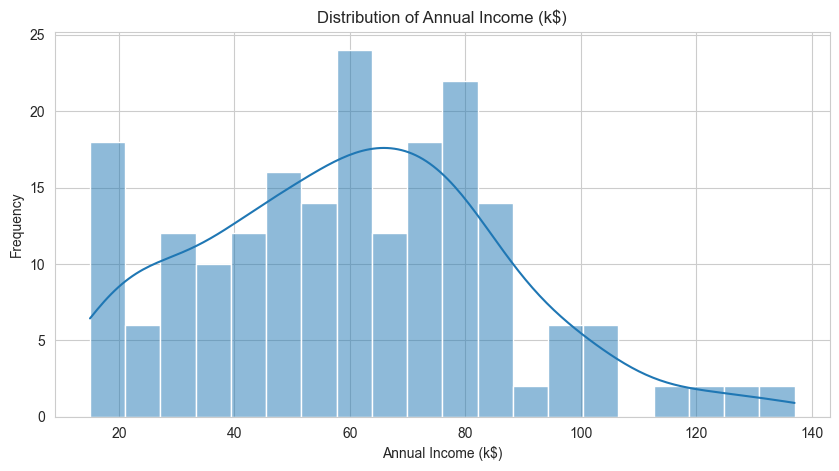

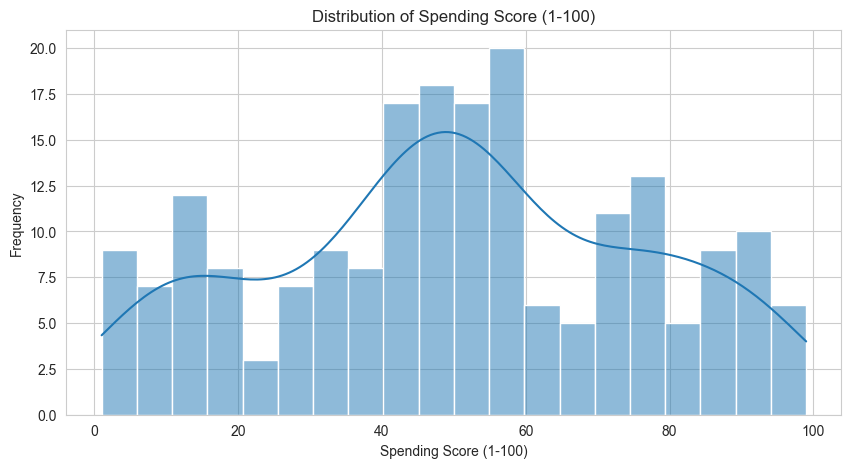

In [50]:
cols = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data_set[i], bins=20, kde=True)
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()
    


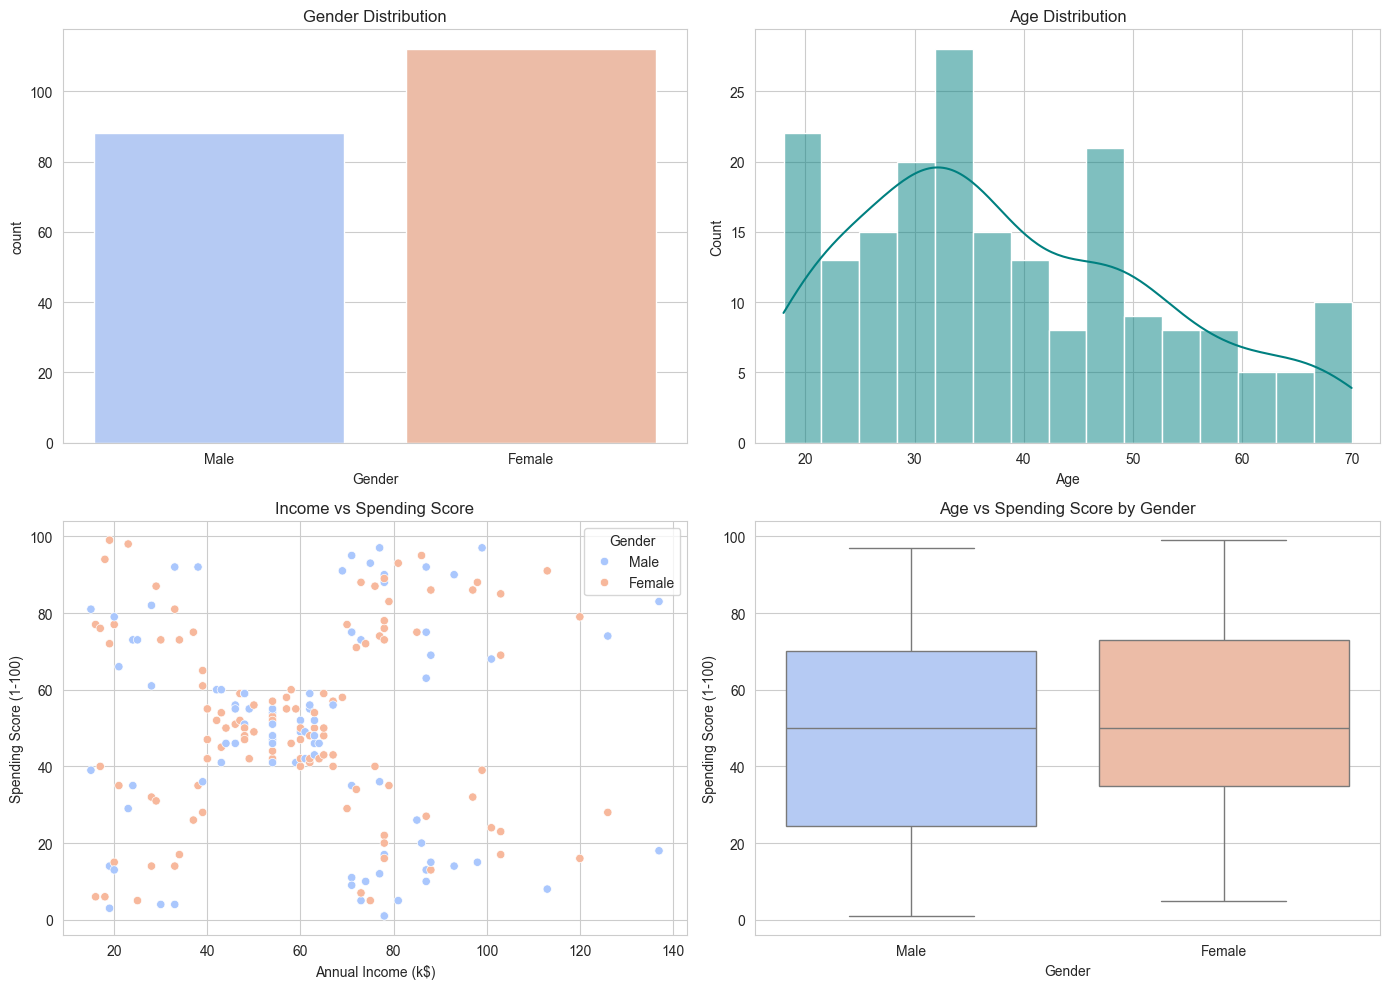

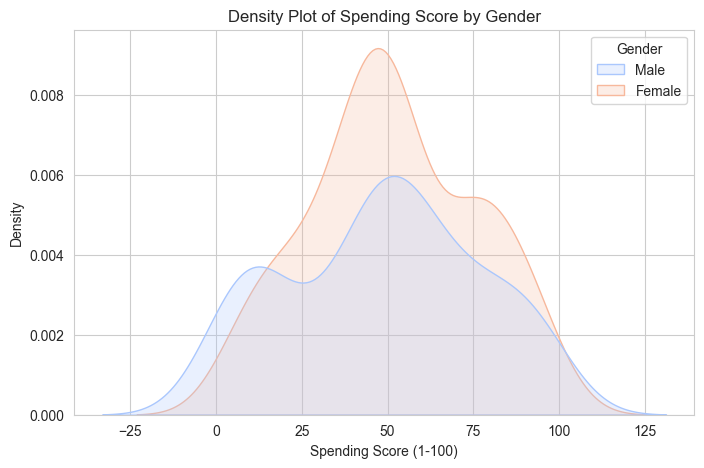

In [51]:
data_set["Spending Score (1-100)"] = pd.to_numeric(data_set["Spending Score (1-100)"], errors='coerce')

# Set plot style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Gender Distribution (Bar Plot)
sns.countplot(x='Gender', data=data_set, ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title("Gender Distribution")

# 2. Age Distribution (Histogram)
sns.histplot(data_set['Age'], bins=15, kde=True, ax=axes[0, 1], color='teal')
axes[0, 1].set_title("Age Distribution")

# 3. Income vs Spending Score (Scatter Plot)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data_set, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title("Income vs Spending Score")

# 4. Age vs Spending Score (Box Plot)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data_set, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title("Age vs Spending Score by Gender")

plt.tight_layout()
plt.show()

# 5. Density Plot of Spending Score by Gender
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data_set, x="Spending Score (1-100)", hue="Gender", fill=True, palette="coolwarm")
plt.title("Density Plot of Spending Score by Gender")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Density")
plt.show()




In [52]:
data_set['Gender'].value_counts(normalize=True) 


Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [53]:
data_set.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()  

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [54]:
correlation_matrix = data_set.select_dtypes(include=['number']).corr()
print(correlation_matrix)


                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


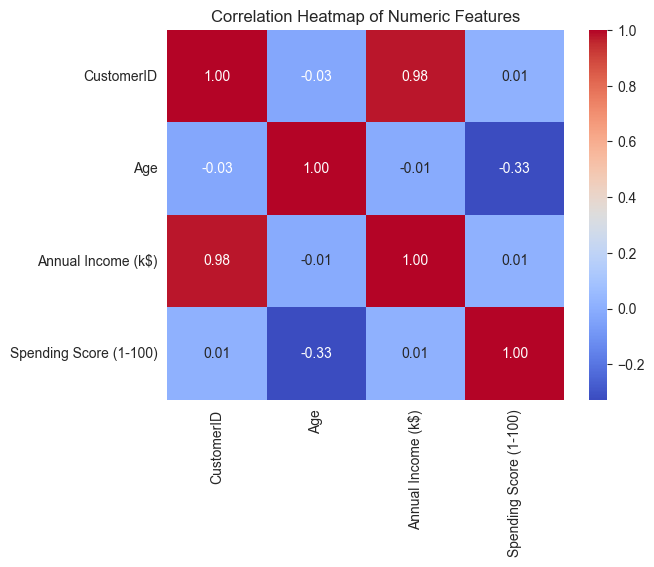

In [55]:

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


### **Data Preprocessing**

In [56]:
# Dropping CustomerID column as it is not needed for clustering
data_set.drop(columns=['CustomerID'])
data_set.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
# Encoding Categorical Columns 
label_encoder = LabelEncoder()
data_set['Gender'] = label_encoder.fit_transform(data_set['Gender'])  # Male = 1, Female = 0 

In [58]:
# Display processed data
print("\nProcessed Data:")
print(data_set.head())


Processed Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40


In [59]:
# Standardizing the DataSet (Scaling)
features_for_clustering = ['Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
scaled_values = scaler.fit_transform(data_set[features_for_clustering])
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [60]:
# Convert Back to DataFrame
scaled_dataset = pd.DataFrame(scaled_values, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
scaled_dataset

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


### **K-MEANS CLUSTERING**

##### **Customer Segments (Annual Income VS Spending Score)**

In [61]:
# Selecting features for clustering 
X = scaled_dataset[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


##### **Finding Optimal Number of Clusters using Elbow Method**

In [62]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
K_range = range(1, 11)  # Checking for clusters from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS (Sum of squared distances to the closest centroid)

In [63]:
wcss

[400.00000000000006,
 273.66888662642015,
 157.7040081503594,
 109.22822707921344,
 65.56840815571681,
 60.13287487193421,
 49.668244837367986,
 37.31912287833883,
 32.49508119910091,
 30.0593226940422]

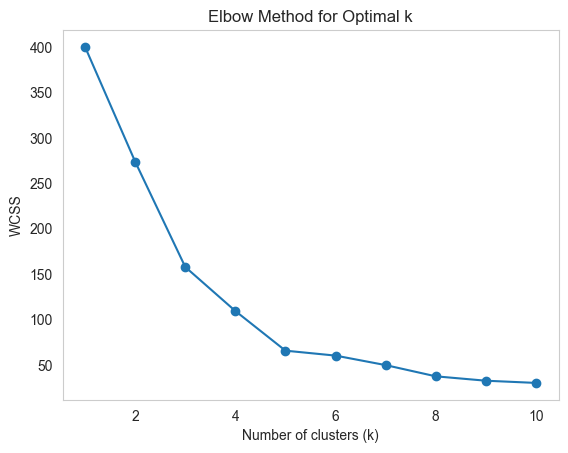

In [64]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k') 
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

##### **Model Training**

In [65]:
X = scaled_dataset[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5, random_state=42)
y_means = kmeans.fit_predict(X)
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [66]:
kmeans.labels_
# Adding cluster labels to the original dataset
data_set['Cluster'] = y_means
data_set.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


In [67]:
data_set.groupby('Cluster')[['Annual Income (k$)','Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


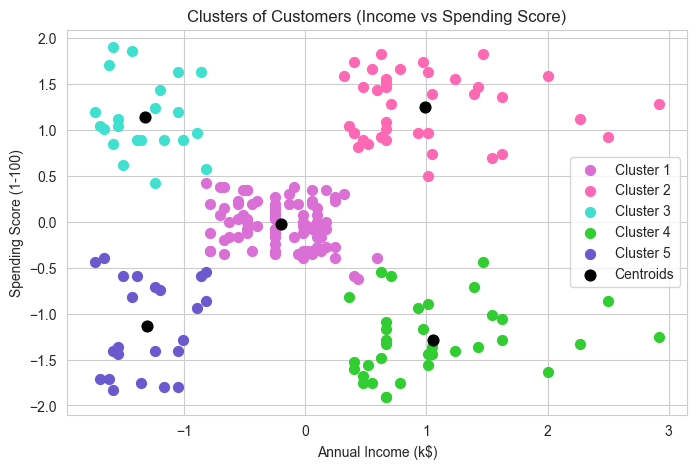

In [68]:
plt.figure(figsize=(8, 5))
plt.scatter(X.iloc[y_means == 0, 0], X.iloc[y_means == 0, 1], s=50, c='orchid', label='Cluster 1')
plt.scatter(X.iloc[y_means == 1, 0], X.iloc[y_means == 1, 1], s=50, c='hotpink', label='Cluster 2')
plt.scatter(X.iloc[y_means == 2, 0], X.iloc[y_means == 2, 1], s=50, c='turquoise', label='Cluster 3')
plt.scatter(X.iloc[y_means == 3, 0], X.iloc[y_means == 3, 1], s=50, c='limegreen', label='Cluster 4')
plt.scatter(X.iloc[y_means == 4, 0], X.iloc[y_means == 4, 1], s=50, c='slateblue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, c='black', label='Centroids')
plt.title('Clusters of Customers (Income vs Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [69]:
kmeans.predict([[2, -1.5]])  # Example prediction for a new customer

array([3], dtype=int32)

#### **Customer Segment (Age VS Spending Score)**

In [70]:
scaler2 = StandardScaler()
scaled_values2 = scaler2.fit_transform(data_set[['Age', 'Spending Score (1-100)']])
scaled_dataset = pd.DataFrame(scaled_values2, columns=['Age', 'Spending Score (1-100)'])
X2 = scaled_dataset[['Age', 'Spending Score (1-100)']]
# Finding the optimal number of clusters using the Elbow Method
wcss2 = []  # Within-Cluster Sum of Squares
K_range = range(1, 11)  # Checking for clusters from 1 to 10

for k in K_range:
    kmeans2 = KMeans(n_clusters=k, random_state=42)
    kmeans2.fit(X2)
    wcss2.append(kmeans2.inertia_)  # Inertia = WCSS (Sum of squared distances to the closest centroid)

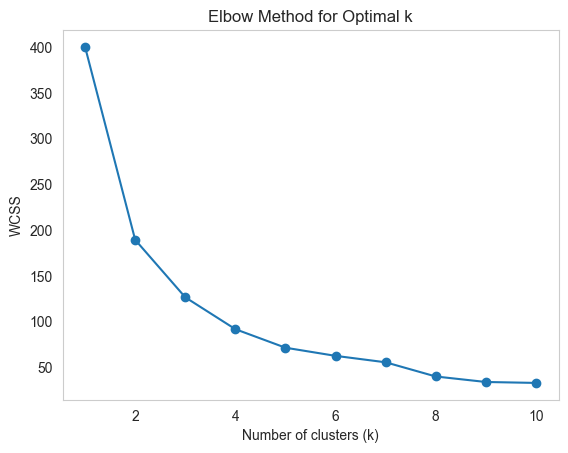

In [71]:
plt.plot(range(1, 11), wcss2, marker='o')
plt.title('Elbow Method for Optimal k') 
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [72]:
kmeans2 = KMeans(n_clusters=5, random_state=42)
y_means2 = kmeans2.fit_predict(X2)
y_means2

array([2, 1, 4, 1, 2, 1, 4, 1, 3, 1, 3, 1, 3, 1, 4, 1, 4, 2, 3, 1, 4, 1,
       3, 1, 3, 1, 3, 2, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 0, 1, 3, 2,
       3, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 4, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 4, 2, 2, 2, 0, 0, 0, 0, 2, 4, 2, 1, 4, 1, 3, 1, 3, 1, 3, 1,
       2, 1, 4, 1, 3, 1, 4, 1, 3, 1, 2, 1, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       3, 1, 4, 1, 4, 1, 0, 1, 4, 1, 3, 1, 3, 1, 4, 2, 4, 1, 4, 1, 3, 1,
       3, 1, 3, 1, 4, 1, 3, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 3, 1, 3, 1,
       4, 1], dtype=int32)

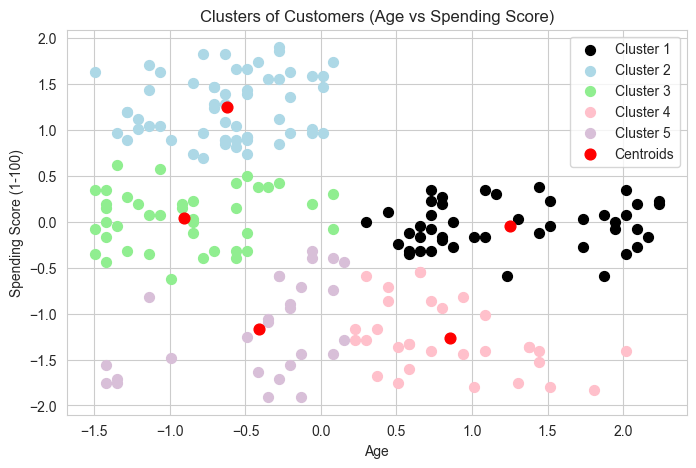

In [73]:
plt.figure(figsize=(8, 5))
plt.scatter(X2.iloc[y_means2 == 0, 0], X2.iloc[y_means2 == 0, 1], s=50, c='black', label='Cluster 1')
plt.scatter(X2.iloc[y_means2 == 1, 0], X2.iloc[y_means2 == 1, 1], s=50, c='lightblue', label='Cluster 2')
plt.scatter(X2.iloc[y_means2 == 2, 0], X2.iloc[y_means2 == 2, 1], s=50, c='lightgreen', label='Cluster 3')
plt.scatter(X2.iloc[y_means2 == 3, 0], X2.iloc[y_means2 == 3, 1], s=50, c='pink', label='Cluster 4')
plt.scatter(X2.iloc[y_means2 == 4, 0], X2.iloc[y_means2 == 4, 1], s=50, c='thistle', label='Cluster 5')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=60, c='red', label='Centroids')
plt.title('Clusters of Customers (Age vs Spending Score)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [74]:
kmeans2.predict([[2, -1.5]])  # Example prediction for a new customer

array([3], dtype=int32)

### **Save the Model**

In [75]:
import joblib
# Save the model
joblib.dump(kmeans, 'Customer_Segmentation_Model')
# Load the model
loaded_model = joblib.load('Customer_Segmentation_Model')
# Predicting a new customer
loaded_model.predict([[2, -1.5]])  # Example prediction for a new customer



array([3], dtype=int32)

### **Graphical User Interface (GUI)**

In [78]:
from tkinter import *
import joblib

# Predict function
def show_entry_fields():
    try:
        p1 = float(e1.get())
        p2 = float(e2.get())

        # Load scaler and model
        scaler = joblib.load('scaler.pkl')
        model = joblib.load('Customer_Segmentation_Model')

        # Scale the input
        input_scaled = scaler.transform([[p1, p2]])

        # Predict
        prediction = model.predict(input_scaled)

        # Correct cluster messages
        messages = {
            0: "Cluster 1: Medium Income, Medium Spending Score",
            1: "Cluster 2: High Income, High Spending Score",
            2: "Cluster 3: Low Income, High Spending Score",
            3: "Cluster 4: High Income, Low Spending Score",
            4: "Cluster 5: Low Income, Low Spending Score"
        }

        # Update result label
        result_label.config(text=messages.get(prediction[0], "Unknown Cluster"))

    except ValueError:
        result_label.config(text="Please enter valid numeric values.")

# GUI Design
master = Tk()
master.title("Customer Segmentation Prediction")
master.configure(bg="white")
master.geometry("400x300")

# Header
header = Label(master, text="Customer Segmentation", bg="#4CAF50", fg="white",
               font=("Helvetica", 18, "bold"), pady=10)
header.pack(fill=X)

# Frame for form
form_frame = Frame(master, bg="white", pady=20)
form_frame.pack()

Label(form_frame, text="Annual Income (k$):", font=("Helvetica", 12), bg="white").grid(row=0, column=0, sticky=W, pady=5)
Label(form_frame, text="Spending Score (1-100):", font=("Helvetica", 12), bg="white").grid(row=1, column=0, sticky=W, pady=5)

e1 = Entry(form_frame, width=25, font=("Helvetica", 12))
e2 = Entry(form_frame, width=25, font=("Helvetica", 12))
e1.grid(row=0, column=1, pady=5, padx=10)
e2.grid(row=1, column=1, pady=5, padx=10)

# Predict Button
Button(master, text='Predict', command=show_entry_fields,
       bg="#2196F3", fg="white", font=("Helvetica", 12, "bold"),
       padx=20, pady=5).pack(pady=10)

# Result Display
result_label = Label(master, text="", fg="#333", bg="white", font=("Helvetica", 12, "italic"), wraplength=350)
result_label.pack(pady=5)

# Run GUI
mainloop()
